<ipython-input-1-e3c01d2a535d>:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


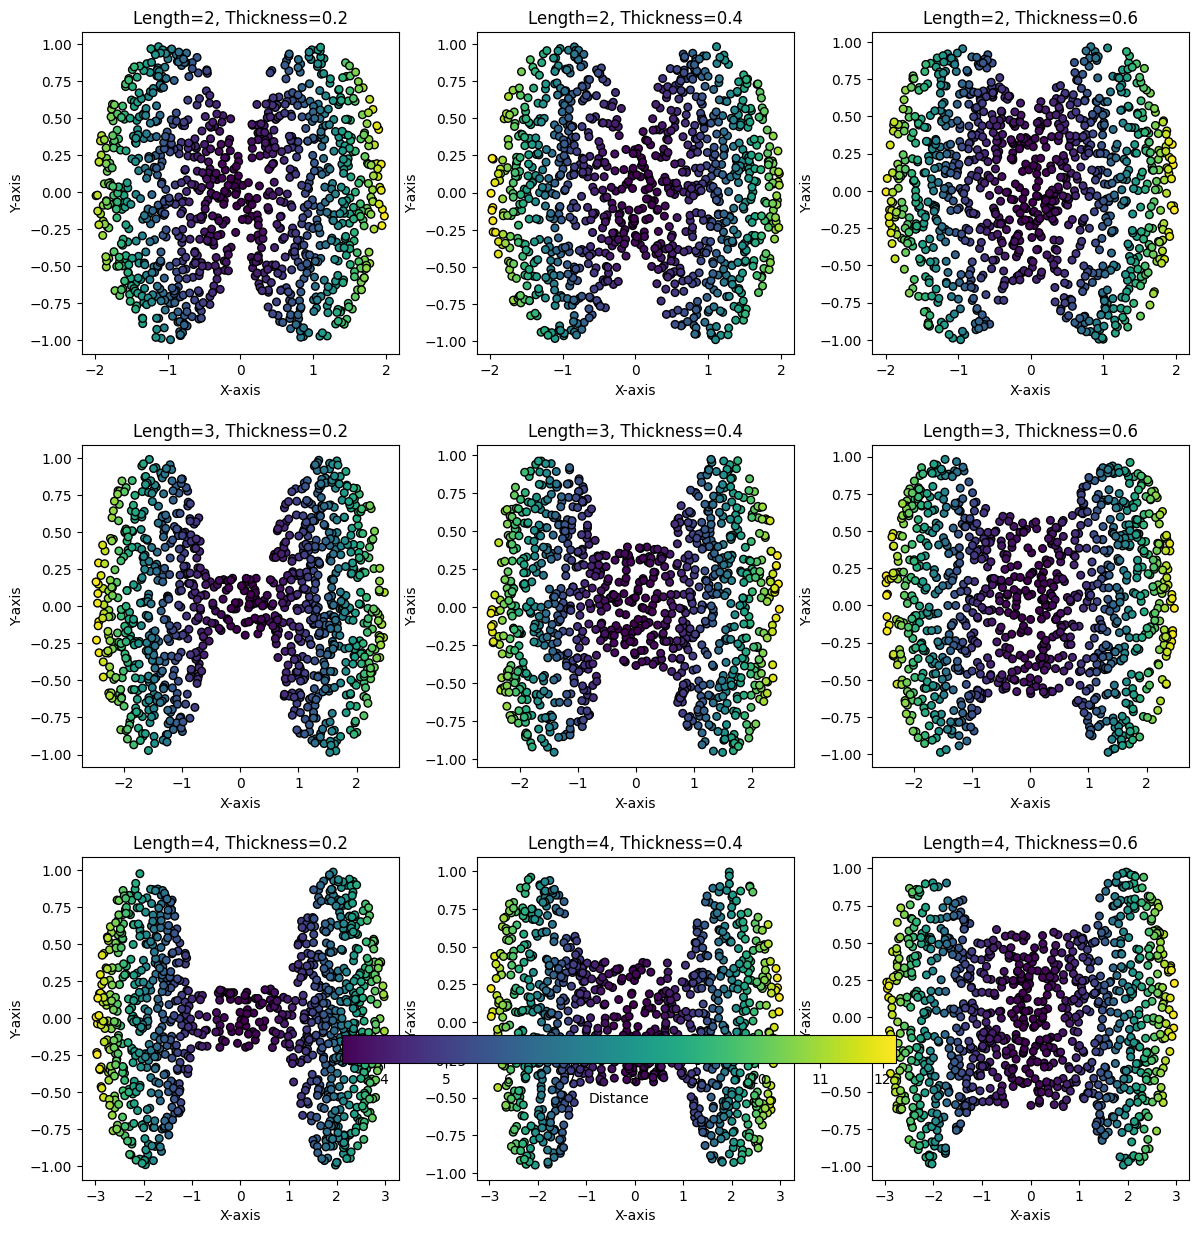

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the distance calculation function
def calculate_distances_close(x, p, close):
    n_samples = x.shape[0]
    distances = np.zeros(n_samples)

    for i in range(n_samples):
        dist_list = []
        for j in range(n_samples):
            if i != j:
                dist = np.linalg.norm(x[i] - x[j], ord=p) ** p
                dist_list.append(dist)

        # Sort the distances and select the top 'close' closest points
        dist_list.sort()
        top_close_dists = dist_list[:close]

        # Calculate the average of these top 'close' distances
        distances[i] = sum(top_close_dists) / close  # Use 'close' for averaging

    return distances

# Function to generate random data points within the two circles and neck shape
def generate_data_points(circle_radius=1, neck_thickness=0.2, neck_length=3, num_points=1000):
    points_x = []
    points_y = []

    # Generate random points for the two circles and the neck
    while len(points_x) < num_points:
        # Generate a random point
        x = np.random.uniform(-neck_length, neck_length)
        y = np.random.uniform(-2, 2)

        # Check if the point lies inside the left or right circle
        if ((x + neck_length / 2) ** 2 + y ** 2 <= circle_radius ** 2) or \
           ((x - neck_length / 2) ** 2 + y ** 2 <= circle_radius ** 2):
            points_x.append(x)
            points_y.append(y)
        # Check if the point lies in the neck region
        elif (np.abs(x) <= neck_length / 2) and (np.abs(y) <= neck_thickness):
            points_x.append(x)
            points_y.append(y)

    return np.array(points_x), np.array(points_y)

# Define a function to generate plots with distance metric coloring for varying neck length and thickness
def plot_distances_varying_neck_and_thickness(p, close):
    # Parameters for the circles
    circle_radius = 1
    neck_lengths = [2, 3, 4]  # Different neck lengths
    neck_thicknesses = [0.2, 0.4, 0.6]  # Different neck thicknesses

    # Create subplots
    fig, axs = plt.subplots(len(neck_lengths), len(neck_thicknesses), figsize=(12, 12))

    for i, neck_length in enumerate(neck_lengths):
        for j, neck_thickness in enumerate(neck_thicknesses):
            # Generate the data points for the current parameters
            points_x, points_y = generate_data_points(circle_radius=circle_radius,
                                                      neck_thickness=neck_thickness,
                                                      neck_length=neck_length,
                                                      num_points=1000)
            X = np.column_stack((points_x, points_y))

            # Calculate the distances using the metric
            distances = calculate_distances_close(X, p, close)

            # Plot each subplot with the distance metric coloring
            scatter = axs[i, j].scatter(X[:, 0], X[:, 1], c=distances, cmap='viridis', s=30, edgecolor='k')
            axs[i, j].set_title(f'Length={neck_length}, Thickness={neck_thickness}')
            axs[i, j].set_xlabel('X-axis')
            axs[i, j].set_ylabel('Y-axis')

    # Adjust layout and add colorbar
    fig.colorbar(scatter, ax=axs, label='Distance', orientation='horizontal', fraction=0.03)
    plt.tight_layout()
    plt.show()

# Call the function with p = 2 and close = 1000
plot_distances_varying_neck_and_thickness(p=2, close=1000)
